# Biblioteki

In [ ]:
!pip install pyclustering
!pip install mycolorpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395099 sha256=9ad6bb48e7934f89e6e711c5fea3d973227a1b498f31488878b321e91a894674
  Stored in directory: /root/.cache/pip/wheels/9f/99/15/e881f46a92690ae77c2e3b255b89ea45d3a867b1b6c2ab3ba9
Successfully built pyclustering
  Preparing metadata (setup.py) ... done
  Created wheel for mycolorpy: filename=mycolorpy-1.5.1-py3-none-any.whl size=3850 sha256=21aa20df0a32253d136ecd9a0c93c1b84810a85eae1c3cb1c3b85574741b9cff
  Stored in directory: /root/.cache/pip/wheels/ff/08/3f/5b1529bd9a56c309bc2b6509247e7f7968b3558c6090ce30ee
Successfully built mycolorpy


In [ ]:
from pyclustering.cluster.clarans import clarans
from pyclustering.cluster import cluster_visualizer_multidim
from sklearn import datasets
from sklearn.datasets import make_moons, make_blobs, make_circles
from matplotlib.markers import MarkerStyle
from matplotlib.transforms import Affine2D
from matplotlib.text import TextPath
import matplotlib.pyplot as plt
import matplotlib
from mycolorpy import colorlist as mcp

import numpy as np

# Blobs

In [ ]:
X, y_true = make_blobs(n_samples=600, centers=3, cluster_std=0.6, random_state=0)

In [ ]:
x_obj = clarans(X, 3, 5, 5)
x_obj.process()

In [ ]:
x_clst = x_obj.get_clusters()
x_med = x_obj.get_medoids()

In [ ]:
med = []
for i in range(len(x_med)):
  med.append(X[x_med[i]].tolist())

med = np.array(med)
med

array([[-1.86676793,  2.73326749],
       [ 1.7829851 ,  1.13962238],
       [ 0.89654173,  4.1251128 ]])

In [ ]:
indx = 0
for i in range(len(x_clst)):
  indx += len(x_clst[i])

y_pred = [0 for i in range(indx)]

for i in range(len(x_clst)):
  for j in (x_clst[i]):
    y_pred[j] = i

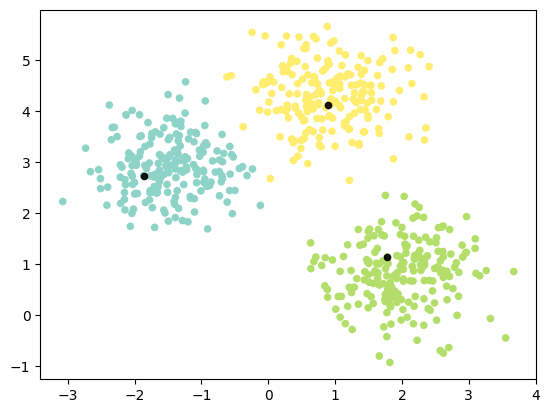

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, cmap='Set3')
plt.scatter(med[:, 0], med[:, 1], c='black', s=20, alpha = 0.9)
plt.show()

# Księżyce

In [ ]:
X, y = make_moons(400, noise=.05, random_state=0)

In [ ]:
x_obj = clarans(X, 2, 5, 5)
x_obj.process()

In [ ]:
x_clst = x_obj.get_clusters()
x_med = x_obj.get_medoids()

In [ ]:
med = []
for i in range(len(x_med)):
  med.append(X[x_med[i]].tolist())

med = np.array(med)

array([[-0.38377338,  0.8904699 ],
       [ 1.26237938, -0.49088759]])

In [ ]:
indx = 0
for i in range(len(x_clst)):
  indx += len(x_clst[i])

y_pred = [0 for i in range(indx)]

for i in range(len(x_clst)):
  for j in (x_clst[i]):
    y_pred[j] = i

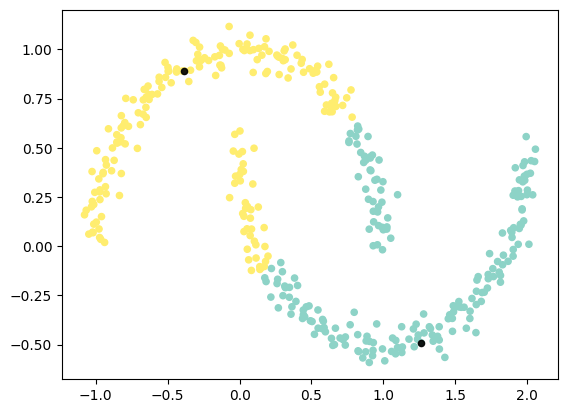

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, cmap='Set3_r')
plt.scatter(med[:, 0], med[:, 1], c='black', s=20, alpha = 0.9)
plt.show()

# Koła

In [ ]:
X, y = make_circles(600,factor = 0.5, noise=0.05, random_state=0)

In [ ]:
x_obj = clarans(X, 2, 5, 5)
x_obj.process()

In [ ]:
x_clst = x_obj.get_clusters()
x_med = x_obj.get_medoids()

In [ ]:
med = []
for i in range(len(x_med)):
  med.append(X[x_med[i]].tolist())

med = np.array(med)

In [ ]:
indx = 0
for i in range(len(x_clst)):
  indx += len(x_clst[i])

y_pred = [0 for i in range(indx)]

for i in range(len(x_clst)):
  for j in (x_clst[i]):
    y_pred[j] = i

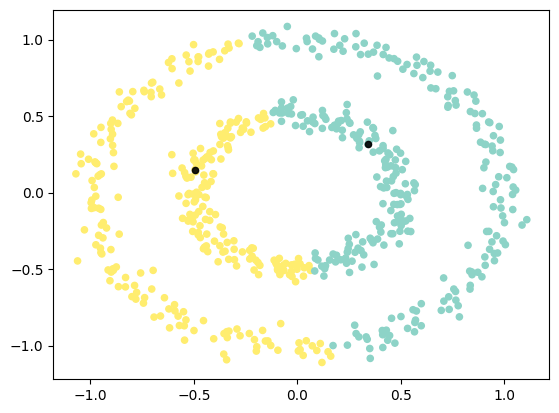

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, cmap='Set3_r')
plt.scatter(med[:, 0], med[:, 1], c='black', s=20, alpha = 0.9)
plt.show()

# Irysy

In [ ]:
iris = datasets.load_iris()

[Text(0.5, 0, 'sepal length (cm)'), Text(0, 0.5, 'sepal width (cm)')]

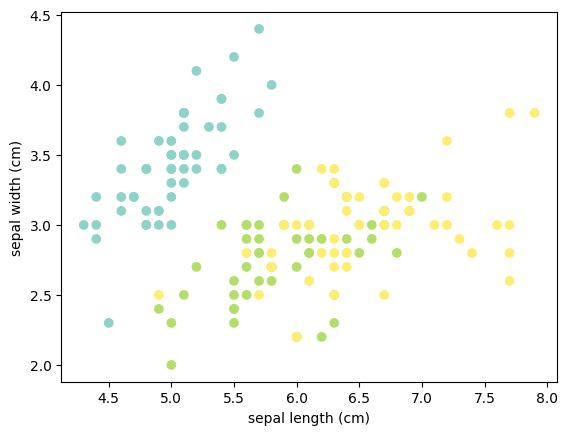

In [ ]:
fig, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, cmap = 'Set3')
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])

In [ ]:
iris_data = iris.data
iris_data = iris_data.tolist()

In [ ]:
iris_obj = clarans(iris_data, 3, 5, 5)
iris_obj.process()

In [ ]:
clst = iris_obj.get_clusters()

In [ ]:
indx = 0
for i in range(len(clst)):
  indx += len(clst[i])

y_pred = [0 for i in range(indx)]

for i in range(len(clst)):
  for j in (clst[i]):
    y_pred[j] = i

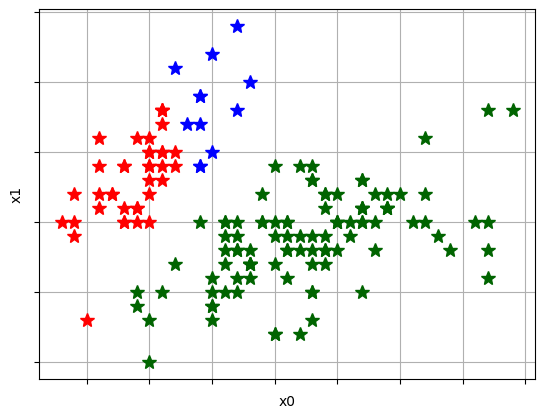

In [ ]:
vis = cluster_visualizer_multidim()
vis.append_clusters(clst,iris_data,marker="*",markersize=10)
vis.show(pair_filter=[[0, 1]],max_row_size=1)